# 特徴量エンジニアリング

## インポート

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## ロード

In [3]:
df_original = pd.read_csv('data/Churn_Modelling.csv')
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 特徴量選択

In [4]:
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], 
                            axis=1)
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


## 特徴量抽出

In [5]:
churn_df['Loyalty'] = churn_df['Tenure'] / churn_df['Age']
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.047619
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0.190476
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.046512


### 従属変数の削除

In [6]:
churn_df = churn_df.drop(['Tenure', 'Age'], axis=1)
churn_df.head()

,CreditScore,Geography,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,619,France,0.00,1,1,1,101348.88,1,0.047619
1,608,Spain,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,159660.80,3,1,0,113931.57,1,0.190476
3,699,France,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,125510.82,1,1,1,79084.10,0,0.046512


## 特徴量変換

In [7]:
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
churn_df = pd.get_dummies(churn_df, drop_first=True)
churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,False,False
1,608,83807.86,1,0,1,112542.58,0,0.024390,False,True
2,502,159660.80,3,1,0,113931.57,1,0.190476,False,False
3,699,0.00,2,0,0,93826.63,0,0.025641,False,False
4,850,125510.82,1,1,1,79084.10,0,0.046512,False,True


## 比率の確認

In [9]:
churn_df["Exited"].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

## CSV出力

In [10]:
churn_df.to_csv("extracted_churn_data.csv", index=0)

## X, Y の定義

In [13]:
y = churn_df['Exited']
X = churn_df.copy()
X = X.drop('Exited', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

## スケーリング

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## フィット

In [23]:
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)
scaled_preds = gnb_scaled.predict(X_test)

## モデルの評価

In [24]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.806
Precision: 0.544
Recall: 0.303
F1 Score: 0.389


In [25]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

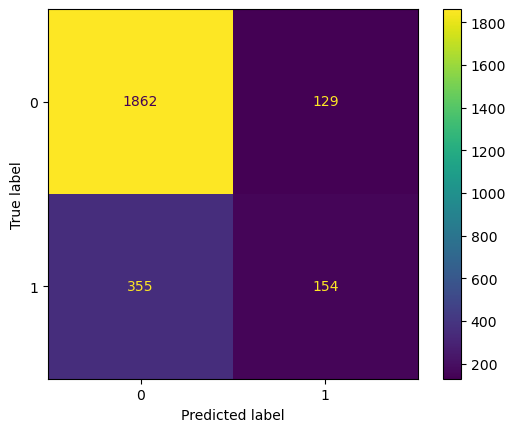

In [22]:
conf_matrix_plot(gnb_scaled, X_test, y_test)